In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [28]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [29]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

In [30]:
X_train.shape

(60000, 28, 28)

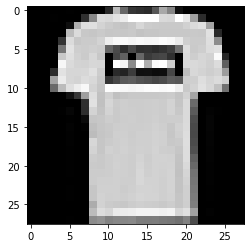

In [31]:
plt.imshow(X_train[1], cmap = 'gray' )

In [32]:
X_train = X_train/255.0
X_test = X_test/255.0

In [33]:
#WE need a 3D map for applying convolution.... so let us reshape our data to correct dimensions
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [34]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [35]:
# We will use the Functional API of Keras for designing of the Model.

i = Input(shape = X_train[0].shape)
x = Conv2D(filters= 32, kernel_size=(3,3), activation= 'relu')(i)
x = BatchNormalization()(x)
x = Conv2D(filters= 32, kernel_size=(3,3), activation= 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(filters= 64, kernel_size=(3,3), activation= 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(filters= 64, kernel_size=(3,3), activation= 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(filters= 128, kernel_size=(3,3), activation= 'relu')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(10, activation='softmax')(x)
model = Model(i,x)

In [36]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        1849

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6830 - accuracy: 0.7656 - val_loss: 0.3244 - val_accuracy: 0.8782
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3350 - accuracy: 0.8792 - val_loss: 0.3491 - val_accuracy: 0.8772
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2968 - accuracy: 0.8935 - val_loss: 0.2935 - val_accuracy: 0.8918
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2725 - accuracy: 0.9011 - val_loss: 0.2739 - val_accuracy: 0.9057
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2475 - accuracy: 0.9104 - val_loss: 0.2407 - val_accuracy: 0.9115
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2283 - accuracy: 0.9172 - val_loss: 0.2371 - val_accuracy: 0.9125
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2089 - accuracy: 0.9235 - val_loss: 0.2226 - val_accuracy:

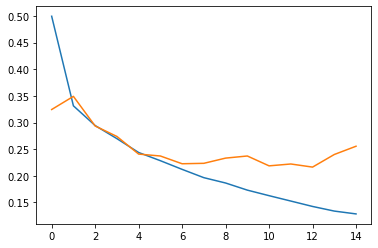

In [38]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

In [40]:
batch_size = 30
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
2000/2000 [==============================] - 20s 10ms/step - loss: 0.4261 - accuracy: 0.8520 - val_loss: 0.2354 - val_accuracy: 0.9126
Epoch 2/50
2000/2000 [==============================] - 19s 9ms/step - loss: 0.3368 - accuracy: 0.8806 - val_loss: 0.2353 - val_accuracy: 0.9160
Epoch 3/50
2000/2000 [==============================] - 19s 9ms/step - loss: 0.3156 - accuracy: 0.8874 - val_loss: 0.2300 - val_accuracy: 0.9140
Epoch 4/50
2000/2000 [==============================] - 19s 10ms/step - loss: 0.2986 - accuracy: 0.8930 - val_loss: 0.2310 - val_accuracy: 0.9150
Epoch 5/50
2000/2000 [==============================] - 19s 10ms/step - loss: 0.2848 - accuracy: 0.8974 - val_loss: 0.2340 - val_accuracy: 0.9145
Epoch 6/50
2000/2000 [==============================] - 20s 10ms/step - loss: 0.2803 - accuracy: 0.8989 - val_loss: 0.2268 - val_accuracy: 0.9182
Epoch 7/50
2000/2000 [==============================] - 19s 10ms/step - loss: 0.2747 - accuracy: 0.9015 - val_loss: 0.2168 - v

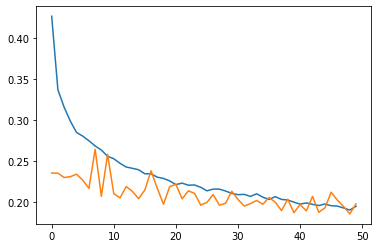

In [41]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

In [42]:
#Hence we see a slight increase in the accuracy after using data augmentation.... Now the training error and validation error are side by side...
#So the Model is not overfitting....
# We used Dropout, Augmentation and Batch Norm to prevent overfitting in the data....